In [44]:
pip install scikit-learn 

In [29]:
import pandas as pd

#loading our dataset into our jupyter notebook. We have uploaded it to github to ensure that every team member always accesses the same file.
housing_df = pd.read_csv ('https://raw.githubusercontent.com/GinoKrijnen/Sub-Assignment-1/main/Housing.csv')

The following code has been written by **Carl Hümbs**:

### **1. Splitting the data into 3 parts**
As the provided data covers the whole housing market of California, US, we wanted to split the state into 3 parts.

This will help us to compare different variables across different regions of the state.

In [37]:
# Finding minimum and maximum latitude values
min_latitude = housing_df['latitude'].min()
max_latitude = housing_df['latitude'].max()

# Calculating split points for latitude (dividing into 3 equal parts)
latitude_range = max_latitude - min_latitude
latitude_split_points = [min_latitude + latitude_range / 3,
                         min_latitude + 2 * latitude_range / 3]

# Assigning data points to regions based on latitude
def assign_region(row):
    if row['latitude'] <= latitude_split_points[0]:
        return 'Southern'
    elif row['latitude'] <= latitude_split_points[1]:
        return 'Middle'
    else:
        return 'Northern'

# Applying the function to create a new column 'region'
housing_df['region'] = housing_df.apply(assign_region, axis=1)

# Now the dataframe has a new column 'region' indicating whether each data point is in Northern, Middle, or Southern California
# let's have a look at it:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Northern,Middle,Southern,region_Northern,region_Southern,region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,0,Middle
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,0,Middle
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,0,Middle
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,0,Middle
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,0,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,0,0,1,0,Northern
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,0,0,1,0,Northern
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,0,0,1,0,Northern
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,0,0,1,0,Northern


### **1.1 Checking if the datapoints were correctlly divided into 3 parts**
In order to check if the data is correctly split into three parts, we created a map:

In [31]:
import folium

# Creating a base map centered around California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Defining region colors
region_colors = {'Northern': 'orange', 'Middle': 'blue', 'Southern': 'red'}

# Plotting data points based on regions from housing_df DataFrame
for index, row in housing_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=region_colors.get(row['region'], 'gray'),  # Default to gray for unknown regions
        fill=True,
        fill_opacity=0.6
    ).add_to(california_map)

# Displaying the map (optional)

In [32]:
# Ensure all expected dummy columns exist in the dataframe
for column in ['Northern', 'Middle', 'Southern']:
    if column not in housing_df.columns:
        housing_df[column] = 0

# Then proceed with your regression code
X = housing_df[['median_income', 'Middle', 'Southern']]
y = housing_df['median_house_value']

In [49]:
import pandas as pd
import statsmodels.api as sm

# Load your data (assuming it's named housing_df)
# housing_df = pd.read_csv('path_to_your_data.csv')

# Classify regions based on latitude
def classify_region(latitude):
    if latitude > 38:
        return 'Northern'
    elif 34 <= latitude <= 38:
        return 'Middle'
    else:
        return 'Southern'

# Applying the function to the latitude column to create the region column
housing_df['region'] = housing_df['latitude'].apply(classify_region)

# Convert categorical region variable to dummy variables
region_dummies = pd.get_dummies(housing_df['region'], drop_first=True)  # drop_first to avoid multicollinearity
housing_df = pd.concat([housing_df, region_dummies], axis=1)

# Define dependent and independent variables
X = housing_df[['housing_median_age', 'Middle', 'Southern']]
y = housing_df['median_house_value']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.17e-59
Time:                        09:37:50   Log-Likelihood:            -2.6973e+05
No. Observations:               20640   AIC:                         5.395e+05
Df Residuals:                   20637   BIC:                         5.395e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.747e+05   2102

c:\Users\ginok\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


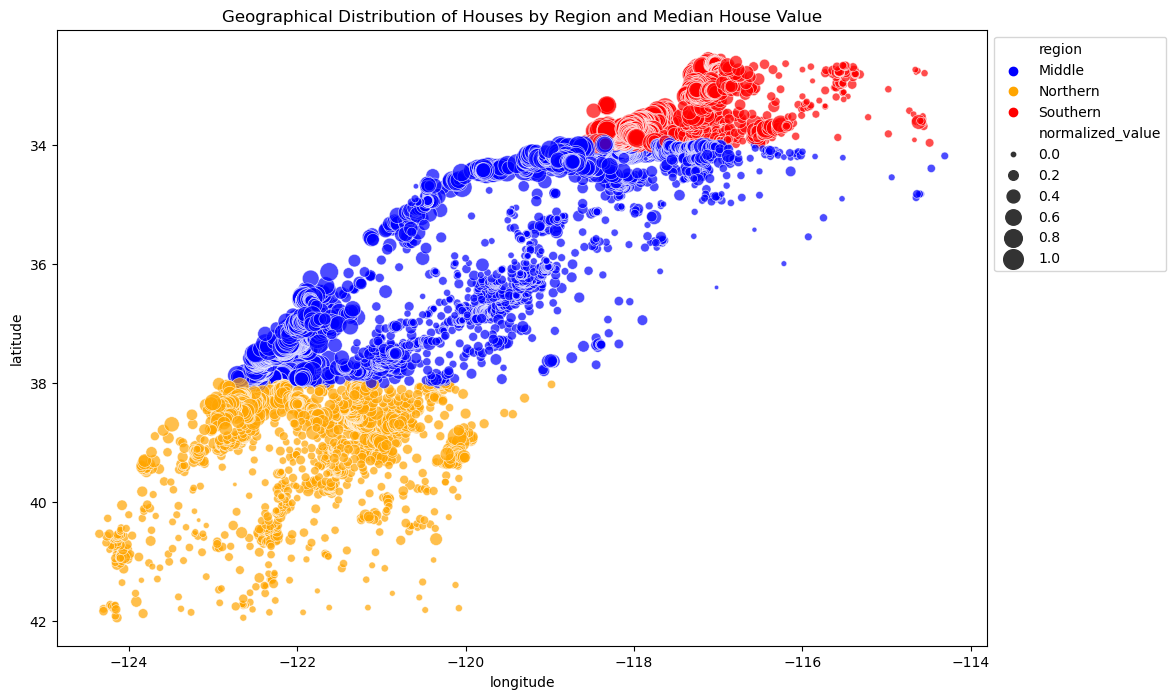

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is loaded into a dataframe named 'housing_df'
# housing_df = pd.read_csv('path_to_your_data.csv')

# Classify regions based on latitude (as defined previously)
def classify_region(latitude):
    if latitude > 38:
        return 'Northern'
    elif 34 <= latitude <= 38:
        return 'Middle'
    else:
        return 'Southern'

housing_df['region'] = housing_df['latitude'].apply(classify_region)

# Normalize the median_house_value for better visualization 
housing_df['normalized_value'] = (housing_df['median_house_value'] - housing_df['median_house_value'].min()) / (housing_df['median_house_value'].max() - housing_df['median_house_value'].min())

# Scatter Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='region', size='normalized_value', sizes=(10, 200), palette={'Northern': 'orange', 'Middle': 'blue', 'Southern': 'red'}, data=housing_df, alpha=0.7)
plt.title('Geographical Distribution of Houses by Region and Median House Value')
plt.gca().invert_yaxis()  # Inverting the y-axis for a more intuitive map layout
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()


<Figure size 1200x800 with 0 Axes>

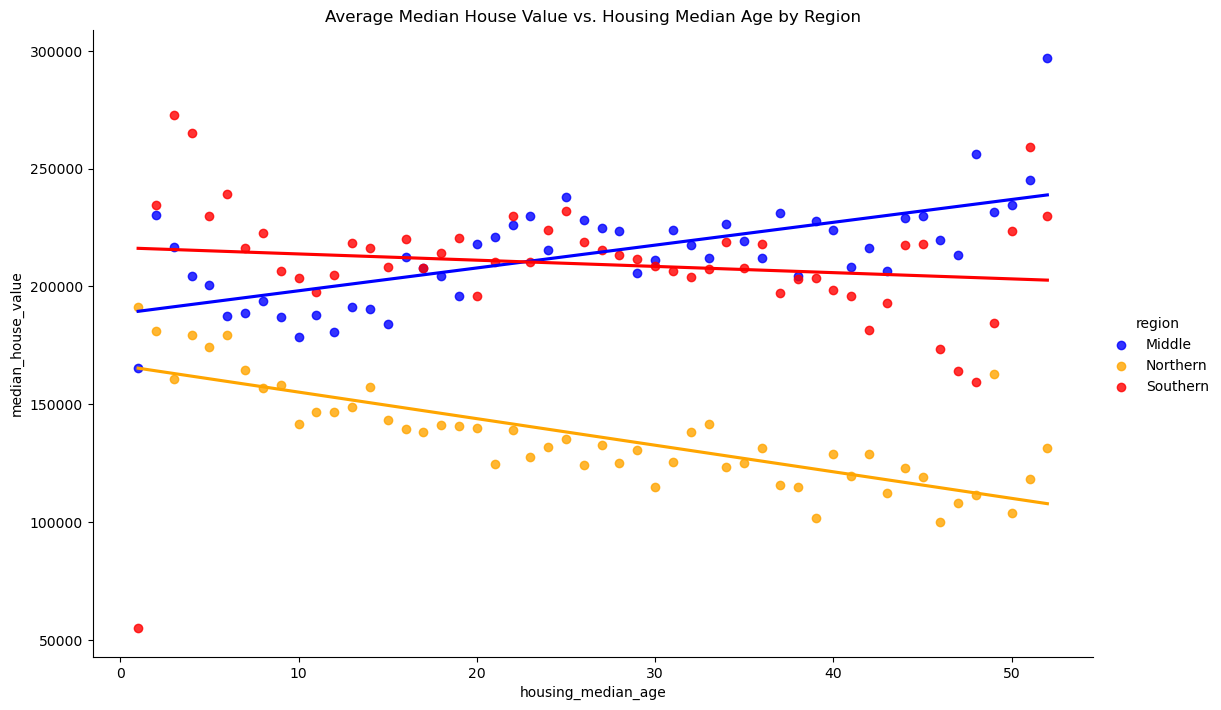

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'housing_df' is your DataFrame and it includes 'region', 'housing_median_age', 'median_house_value' columns

# Group the data by 'region' and 'housing_median_age' and calculate the mean 'median_house_value'
average_values = housing_df.groupby(['region', 'housing_median_age']).median_house_value.mean().reset_index()

# Now plot the aggregated data
plt.figure(figsize=(12, 8))
sns.lmplot(x='housing_median_age', y='median_house_value', hue='region', data=average_values, height=7, aspect=1.6, ci=None, palette={'Northern': 'orange', 'Middle': 'blue', 'Southern': 'red'})

plt.title('Average Median House Value vs. Housing Median Age by Region')
plt.show()

<Figure size 1200x800 with 0 Axes>

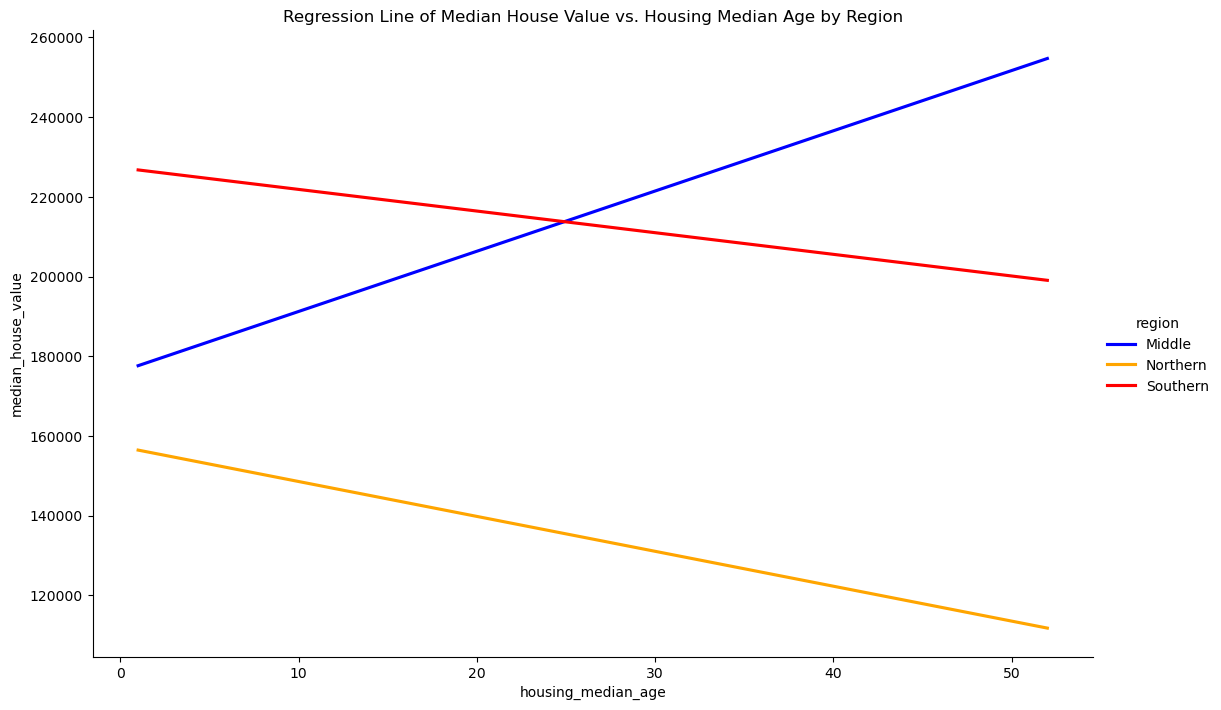

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already classified into regions in 'housing_df'

# Regression plot using Seaborn without data points
plt.figure(figsize=(12, 8))
sns.lmplot(x='housing_median_age', y='median_house_value', hue='region', data=housing_df, height=7, aspect=1.6, ci=None, scatter=False, palette={'Northern': 'orange', 'Middle': 'blue', 'Southern': 'red'})

plt.title('Regression Line of Median House Value vs. Housing Median Age by Region')
plt.show()
